# Deep Learning Lab Assignment

## Problem Statement
The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Dataset Description 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 


__Input variables:__

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced', 'married', 'single')

4 - education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')

5 - default: has credit in default? (categorical: 'no','yes')

6 - balance: balance amount in the account(numerical)

7 - housing: has housing loan? (categorical: 'no','yes')

8 - loan: has personal loan? (categorical: 'no','yes')

9 - contact: contact communication type (categorical: 'cellular','telephone', 'unknown') 

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the month (numeric :1 to 31)

12 - duration: last contact duration, in seconds (numeric). 

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

__Output variable (desired target):__

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')


## Task
1. Load Data
2. Perform necessary Data preprocessing
3. Split the Data into train and test
4. Do the following:
    
    a. Build an MLP (Multi Layer Perceptron)
    
    b. Build an SVM
    
    c. Build an autoencoder and derive encoding features from the hidden layer. Use encoded features from autoencoder as features to a MLP and build the model
    
    d. Build SVM from the autoencoder features generated from the above step (c)
    
5. Check the performance of the above built models with appropriate metrics.

Justify your metric and finalise the model.

## Load Lib

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing




from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras import optimizers
from keras import initializers
from keras.callbacks import EarlyStopping


from time import time
from tensorflow.python.keras.callbacks import TensorBoard

import matplotlib.pyplot as plt
%matplotlib inline  
import os

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


from custom_python_package import data_insight as di
from custom_python_package import data_plot as dp
from custom_python_package import data_model as dm
from custom_python_package import data_model_alteration as dma
from custom_python_package import data_model_evaluation as dme
import time




Using TensorFlow backend.


In [2]:
seed = 777
di.set_env_var()
di.set_seed(seed=seed)

In [3]:
NAME = "bank-data-{}".format(int(time.time()))
#tensorboard = TensorBoard(log_dir="/Users/samyam/Documents/Samya/Tensorboard/insofe_Hote_bank_data_logs/{}".format(NAME), histogram_freq=2)
tensorboard = TensorBoard(log_dir="/Users/samyam/Documents/Samya/Tensorboard/insofe_Hote_bank_data_logs/{}".format(NAME))



## Import required data

In [4]:
os.getcwd()

'/Users/samyam/Documents/Samya/GIT/insofe/DL_Homework'

In [5]:
bank_data = di.data_importer_csv("bank-full-1540270465813.csv",sep=';')

The number of Rows in the Data set  = 45211
The number of Columns in the data set = 17


## Pre Processing

### Data Analysis

In [6]:
di.data_description(bank_data)

The columns in the data set are : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
The data types of the columns are :

 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


__Check the first and last 5 rows in dataset to get an understanding of data__

In [7]:
bank_data.head()
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


__Random Sample rows__

In [8]:
di.get_data_sample(bank_data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4491,36,blue-collar,married,unknown,no,-656,yes,no,unknown,20,may,92,2,-1,0,unknown,no
27745,36,technician,married,tertiary,no,167,yes,no,cellular,28,jan,57,1,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
19951,43,self-employed,married,primary,no,9304,no,no,cellular,8,aug,362,4,-1,0,unknown,no
32620,30,blue-collar,single,unknown,no,306,yes,no,cellular,17,apr,314,1,-1,0,unknown,no
20388,34,management,married,tertiary,no,2657,yes,no,cellular,11,aug,159,3,-1,0,unknown,no
34700,41,services,married,unknown,no,394,yes,no,cellular,5,may,52,3,-1,0,unknown,no
12597,30,services,single,tertiary,no,0,no,no,unknown,4,jul,71,1,-1,0,unknown,no
14445,34,admin.,divorced,secondary,no,0,yes,yes,cellular,14,jul,194,3,-1,0,unknown,no
44043,41,admin.,single,secondary,no,985,yes,no,cellular,30,jun,274,2,391,11,success,yes


__Data Description__

In [9]:
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


__Distribution of target attribute__

no     39922
yes     5289
Name: y, dtype: int64
no     88.30152
yes    11.69848
Name: y, dtype: float64


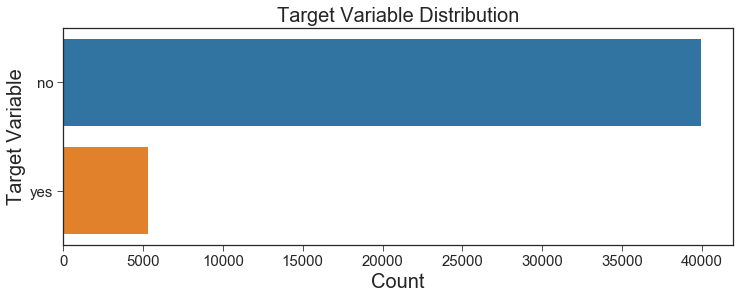

In [10]:
dp.plot_data_dist_across_targ(bank_data, "y")

__Check count of null in each column & its percent__

In [11]:
di.get_null_count_per_attribute(bank_data)

,total_missing,perc_missing
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


__Check for monotonically increasing columns__

In [12]:
di.get_monotonically_incleasing_attributes(bank_data)

__Observations__

1. No missing values in any fields
2. Highly class imbalanced
3. 

### Rename columns

In [13]:
bank_data_rename = bank_data.rename(index=str, columns={"job": "type_of_job", "marital": "marital_status", 
                                     "default":"has_credit_in_default", "balance":"balance_in_account",
                                    "housing":"has_housing_loan", "loan":"has_personal_loan",
                                    "contact":"contact_comm_type", "month":"last_contact_month_of_year",
                                    "day":"last_contact_day_of_the_month", 
                                    "duration":"last_contact_duration",
                                    "campaign":"num_of_contacts_performed_during_this_campaign_for_this_client",
                                    "pdays":"num_days_passed_after_client_last_contacted_from_prev_campaign",
                                    "previous":"num_contacts_performed_before_this_campaign_for_this_client",
                                    "poutcome":"outcome_of_previous_marketing_campaign",
                                    "y":"target_has_client_subscribed_term_deposit"})
bank_data_rename

,age,type_of_job,marital_status,education,has_credit_in_default,balance_in_account,has_housing_loan,has_personal_loan,contact_comm_type,last_contact_day_of_the_month,last_contact_month_of_year,last_contact_duration,num_of_contacts_performed_during_this_campaign_for_this_client,num_days_passed_after_client_last_contacted_from_prev_campaign,num_contacts_performed_before_this_campaign_for_this_client,outcome_of_previous_marketing_campaign,target_has_client_subscribed_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### DataType Conversions

In [14]:
cat_col = ['type_of_job', 'marital_status', 'education', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan',
          'contact_comm_type', 'last_contact_month_of_year', 'outcome_of_previous_marketing_campaign', 
           'target_has_client_subscribed_term_deposit']
num_col = np.setdiff1d(bank_data_rename.columns, cat_col).tolist()

cat_col
num_col

['type_of_job',
 'marital_status',
 'education',
 'has_credit_in_default',
 'has_housing_loan',
 'has_personal_loan',
 'contact_comm_type',
 'last_contact_month_of_year',
 'outcome_of_previous_marketing_campaign',
 'target_has_client_subscribed_term_deposit']

['age',
 'balance_in_account',
 'last_contact_day_of_the_month',
 'last_contact_duration',
 'num_contacts_performed_before_this_campaign_for_this_client',
 'num_days_passed_after_client_last_contacted_from_prev_campaign',
 'num_of_contacts_performed_during_this_campaign_for_this_client']

In [15]:
#Do the datatype conversion
bank_data_rename[cat_col] = di.covert_var(bank_data_rename[cat_col], "cat")
bank_data_rename[num_col] = di.covert_var(bank_data_rename[num_col], "num_int")    

bank_data_rename.head()
bank_data_rename.dtypes

,age,type_of_job,marital_status,education,has_credit_in_default,balance_in_account,has_housing_loan,has_personal_loan,contact_comm_type,last_contact_day_of_the_month,last_contact_month_of_year,last_contact_duration,num_of_contacts_performed_during_this_campaign_for_this_client,num_days_passed_after_client_last_contacted_from_prev_campaign,num_contacts_performed_before_this_campaign_for_this_client,outcome_of_previous_marketing_campaign,target_has_client_subscribed_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


age                                                                  int64
type_of_job                                                       category
marital_status                                                    category
education                                                         category
has_credit_in_default                                             category
balance_in_account                                                   int64
has_housing_loan                                                  category
has_personal_loan                                                 category
contact_comm_type                                                 category
last_contact_day_of_the_month                                        int64
last_contact_month_of_year                                        category
last_contact_duration                                                int64
num_of_contacts_performed_during_this_campaign_for_this_client       int64
num_days_passed_after_cli

##  Train-Test Split

In [16]:
bank_data_rename.shape
bank_data_rename.head()

(45211, 17)

,age,type_of_job,marital_status,education,has_credit_in_default,balance_in_account,has_housing_loan,has_personal_loan,contact_comm_type,last_contact_day_of_the_month,last_contact_month_of_year,last_contact_duration,num_of_contacts_performed_during_this_campaign_for_this_client,num_days_passed_after_client_last_contacted_from_prev_campaign,num_contacts_performed_before_this_campaign_for_this_client,outcome_of_previous_marketing_campaign,target_has_client_subscribed_term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
X=bank_data_rename.drop("target_has_client_subscribed_term_deposit", axis=1)
y=bank_data_rename["target_has_client_subscribed_term_deposit"]

__Split__

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


## Using OHE & Label Encoding

### Categorical to numeric conversion

__Non Target variables__

In [20]:
cat_col = ['type_of_job', 'marital_status', 'education', 'has_credit_in_default', 'has_housing_loan', 'has_personal_loan',
          'contact_comm_type', 'last_contact_month_of_year', 'outcome_of_previous_marketing_campaign']
num_col = np.setdiff1d(X_train.columns, cat_col).tolist()

cat_col
num_col

['type_of_job',
 'marital_status',
 'education',
 'has_credit_in_default',
 'has_housing_loan',
 'has_personal_loan',
 'contact_comm_type',
 'last_contact_month_of_year',
 'outcome_of_previous_marketing_campaign']

['age',
 'balance_in_account',
 'last_contact_day_of_the_month',
 'last_contact_duration',
 'num_contacts_performed_before_this_campaign_for_this_client',
 'num_days_passed_after_client_last_contacted_from_prev_campaign',
 'num_of_contacts_performed_during_this_campaign_for_this_client']

In [21]:
ohe = preprocessing.OneHotEncoder()
ohe.fit(X_train[cat_col])
X_train_cat_to_num = ohe.transform(X_train[cat_col]).todense()
X_train_cat_to_num_df = pd.DataFrame(X_train_cat_to_num)
X_train_cat_to_num_df

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


__Add the OHE vectors to numeric columns__

In [22]:
X_train_altered = pd.concat(
    [X_train_cat_to_num_df.reset_index(drop=True), X_train[num_col].reset_index(drop=True)], axis=1)
X_train_altered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,age,balance_in_account,last_contact_day_of_the_month,last_contact_duration,num_contacts_performed_before_this_campaign_for_this_client,num_days_passed_after_client_last_contacted_from_prev_campaign,num_of_contacts_performed_during_this_campaign_for_this_client
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39,34,27,114,0,-1,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49,4374,31,68,0,-1,3
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,66,0,8,189,0,-1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33,-119,27,150,0,-1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51,794,24,747,0,-1,1
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,33,1586,20,39,0,-1,4
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,43,1968,10,279,0,-1,1
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44,7635,21,719,0,-1,5
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48,9622,12,787,0,-1,6
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42,3038,18,693,0,-1,7


__Target Variable__

As there are only two possible values, we can label encode to 0 & 1

In [23]:
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_altered = le.transform(y_train)
y_train_altered

LabelEncoder()

array([0, 0, 0, ..., 0, 0, 0])

### Model Building

#### MLP

Given 36000 data points for train we can have 360 - 500 weights 

In [24]:
model = Sequential()

model.add(Dense(units=16, input_dim=51, activation='relu', kernel_initializer=initializers.glorot_uniform(seed=seed)))
model.add(Dense(units=8, activation='relu', kernel_initializer=initializers.glorot_uniform(seed=seed)))
model.add(Dense(units=1, activation='sigmoid'))


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 977
Trainable params: 977
Non-trainable params: 0
_________________________________________________________________


__Compilation__

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


__Training__

In [27]:
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=10, \
                          verbose=2, mode='auto')
callbacks_list = [earlystop, tensorboard]

__Validation data__

In [28]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_altered, y_train_altered, test_size=0.2)  


In [29]:
model_hist = model.fit(X_train, y_train, epochs=100, batch_size=64,shuffle=True,callbacks=callbacks_list,validation_data=(X_val, y_val))



Train on 28934 samples, validate on 7234 samples
Epoch 1/100
28934/28934 [==============================] - 1s 40us/step - loss: 0.9420 - acc: 0.8619 - val_loss: 0.8623 - val_acc: 0.7357
Epoch 2/100
28934/28934 [==============================] - 1s 25us/step - loss: 0.3544 - acc: 0.8775 - val_loss: 0.3338 - val_acc: 0.8861
Epoch 3/100
28934/28934 [==============================] - 1s 24us/step - loss: 0.3230 - acc: 0.8839 - val_loss: 0.3629 - val_acc: 0.8897
Epoch 4/100
28934/28934 [==============================] - 1s 24us/step - loss: 0.3159 - acc: 0.8829 - val_loss: 0.3142 - val_acc: 0.8655
Epoch 5/100
28934/28934 [==============================] - 1s 23us/step - loss: 0.3020 - acc: 0.8849 - val_loss: 0.2807 - val_acc: 0.8808
Epoch 6/100
28934/28934 [==============================] - 1s 21us/step - loss: 0.3127 - acc: 0.8871 - val_loss: 0.2675 - val_acc: 0.8898
Epoch 7/100
28934/28934 [==============================] - 1s 21us/step - loss: 0.3333 - acc: 0.8825 - val_loss: 0.3601 - v

__Process Test data__

In [30]:
X_test_cat_to_num = ohe.transform(X_test[cat_col]).todense()
X_test_cat_to_num_df = pd.DataFrame(X_test_cat_to_num)
X_test_cat_to_num_df

X_test_altered = pd.concat(
    [X_test_cat_to_num_df.reset_index(drop=True), X_test[num_col].reset_index(drop=True)], axis=1)
X_test_altered

y_test_altered = le.transform(y_test)
y_test_altered

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,age,balance_in_account,last_contact_day_of_the_month,last_contact_duration,num_contacts_performed_before_this_campaign_for_this_client,num_days_passed_after_client_last_contacted_from_prev_campaign,num_of_contacts_performed_during_this_campaign_for_this_client
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51,863,19,169,2,189,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,238,7,200,0,-1,2
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,82,243,26,275,2,180,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25,3,26,170,0,-1,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42,134,8,82,0,-1,1
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,53,0,19,160,0,-1,3
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,42,105,27,85,0,-1,4
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40,632,5,611,0,-1,2
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,0,4,96,0,-1,1
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35,4788,3,227,0,-1,1


array([0, 0, 1, ..., 1, 0, 0])

__Evaluation__

In [31]:

# Predictions
train_pred = model.predict_classes(X_train_altered)
test_pred = model.predict_classes(X_test_altered)

#Evaluation metrics
confusion_matrix_train = confusion_matrix(y_train_altered, train_pred)
confusion_matrix_test = confusion_matrix(y_test_altered, test_pred)

print("Confusion matrices:")
print("---------------------")
print("Confusion matrix - Train:")
print(confusion_matrix_train)
print("Confusion matrix - Test:")
print(confusion_matrix_test)
print("---------------------")

# Metrics on train data
#Accuracy
accuracy_Train_hiddenExp = (confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#specificity or true negative rate (TNR)
specificity_Train_hiddenExp = confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Train_hiddenExp = confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
#precision
precision_Train_hiddenExp = confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])

print("Evaluation metrics on train data for new model:")
print("------------------------------------")
print("Train Specificity: ",specificity_Train_hiddenExp)
print("Train Recall: ",recall_Train_hiddenExp)
print("Train Precision: ",precision_Train_hiddenExp)
print("Train Accuracy: ",accuracy_Train_hiddenExp)
print("------------------------------------")


# Metrics on test data
#Accuracy
accuracy_Test_hiddenExp = (confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#specificity or true negative rate (TNR)
specificity_Test_hiddenExp = confusion_matrix_test[0,0]/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1])
#sensitivity, recall, hit rate, or true positive rate (TPR)
recall_Test_hiddenExp = confusion_matrix_test[1,1]/(confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
#precision
precision_Test_hiddenExp = confusion_matrix_test[1,1]/(confusion_matrix_test[0,1]+confusion_matrix_test[1,1])

print("Evaluation metrics on test data for new model:")
print("------------------------------------")
print("Test Specificity: ",specificity_Test_hiddenExp)
print("Test Recall: ",recall_Test_hiddenExp)
print("Test Precision: ",precision_Test_hiddenExp)
print("Test Accuracy: ",accuracy_Test_hiddenExp)
print("------------------------------------")


Confusion matrices:
---------------------
Confusion matrix - Train:
[[31184   773]
 [ 3066  1145]]
Confusion matrix - Test:
[[7758  207]
 [ 774  304]]
---------------------
Evaluation metrics on train data for new model:
------------------------------------
Train Specificity:  0.9758112463622993
Train Recall:  0.2719069104725718
Train Precision:  0.5969760166840459
Train Accuracy:  0.8938564476885644
------------------------------------
Evaluation metrics on test data for new model:
------------------------------------
Test Specificity:  0.9740112994350283
Test Recall:  0.2820037105751391
Test Precision:  0.5949119373776908
Test Accuracy:  0.8915183014486343
------------------------------------


__Visual Representation__

__Plot the training and validation loss__

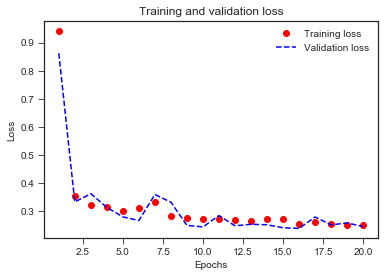

In [32]:
history_dict = model_hist.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(model_hist.epoch)+1) # creating a range object for plotting on x axis

plt.plot(epochs, loss_values, 'ro', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b--', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

__Plot the training and validation accuracy__

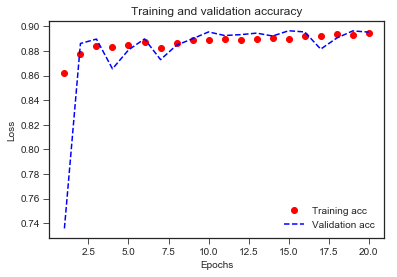

In [33]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'b--', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show();

## Implementations
1. Create MLP using random hyper-parameters 
2. OHE of Categorical Data
3. Tensor Board

## Questions

1. Do we need to do the below as we do for ML :-
    2. correlation analysis?
    3. Outlier removal?
2. Can i use Categorical embeddings in place of OHE?